# Digits Data Classification

In [4]:
#######################################
### Import Data Processing Packages ###
#######################################

import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

########################################
### Import Machine Learning Packages ###
########################################

from sklearn.preprocessing   import StandardScaler;
from sklearn.preprocessing   import PolynomialFeatures;

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV;
from sklearn.metrics         import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error;

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis;

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model    import LinearRegression;
from sklearn.linear_model    import LogisticRegression;
from sklearn.linear_model    import Ridge;
from sklearn.linear_model    import Lasso;

from sklearn.manifold import TSNE

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.neural_network  import MLPClassifier;

from sklearn.pipeline import Pipeline;

#import xgboost as xgb;

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam ,RMSprop
from keras.utils.np_utils import to_categorical

########################
### Import Data Sets ###
########################

from sklearn                 import datasets;

Using Theano backend.


In [2]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


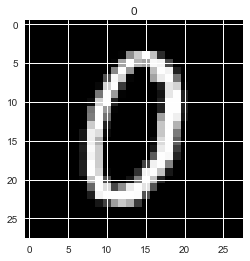

In [3]:
i=5

img = df.drop('label', axis=1).iloc[i].as_matrix()
img = img.reshape((28,28))

plt.imshow(img,cmap='gray')
plt.title(df['label'].values[i])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
sns.pairplot(data=df, hue='target')

# Scale and Train,Test,Split

In [3]:
# Scale features to mean = 1, std = 1

scaler = StandardScaler();

scaler.fit(df.drop('label', axis=1));

scaled_df = scaler.transform(df.drop('label', axis=1));

df_feat = pd.DataFrame(scaled_df, columns=df.columns[:-1])
df_feat.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.977753e-15,9.143428e-16,-3.418289e-16,-3.896631e-16,2.595291e-15,2.534348e-15,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.473660e-02,-2.527001e-02,-1.802557e-02,-1.147285e-02,-9.099140e-03,-6.896989e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.473660e-02,-2.527001e-02,-1.802557e-02,-1.147285e-02,-9.099140e-03,-6.896989e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.473660e-02,-2.527001e-02,-1.802557e-02,-1.147285e-02,-9.099140e-03,-6.896989e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.473660e-02,-2.527001e-02,-1.802557e-02,-1.147285e-02,-9.099140e-03,-6.896989e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.020088e+01,5.478978e+01,7.724688e+01,1.437509e+02,1.340650e+02,1.496578e+02,0.0,0.0,0.0,0.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['label'], test_size=0.1);

# K Nearest Neighbors

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(knn, scaled_df, df['label'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[420   0   1   0   0   1   5   0   0   0]
 [  0 456   1   1   0   0   1   2   0   0]
 [  4   0 396   1   2   0   8   3   3   2]
 [  1   1   9 419   0   3   0   3   6   1]
 [  0   7   7   1 338   0   1   2   1  14]
 [  1   1   3  12   1 358   5   1   1   3]
 [  4   0   1   0   0   0 390   0   0   0]
 [  0   4   6   2   8   0   0 414   0  16]
 [  4   5   3   9   3   6   3   3 369   3]
 [  1   0   4   2   6   3   0  15   1 408]]


Classification Report
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       427
          1       0.96      0.99      0.98       461
          2       0.92      0.95      0.93       419
          3       0.94      0.95      0.94       443
          4       0.94      0.91      0.93       371
          5       0.96      0.93      0.95       386
          6       0.94      0.99      0.97       395
          7       0.93      0.92      0.93       450
          8       0.97      0.90      0.94       4

In [19]:
param_grid = [{'n_neighbors': np.arange(1, 10),
               'weights':     ['uniform', 'distance'],
               'algorithm':   ['ball_tree', 'kd_tree', 'brute']
              }]

grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.965478841871


Best Estimator


KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

# Decision Tree

In [6]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(dtree, scaled_df, df['target'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[397   0   3   5   1   7   4   2   2   6]
 [  2 434   6   5   3   0   1   2   7   1]
 [  2   9 352  12   6   3   6  12  12   5]
 [  4   4  16 351   5  22   5   5  15  16]
 [  5   1   7   3 324   1   8   3   4  15]
 [  4   3   2  26   3 300  14   4  22   8]
 [  6   1   8   4   3   8 357   1   4   3]
 [  1   4  15   5   7   2   0 404   2  10]
 [  3   6  12  14   8  10  10   4 328  13]
 [  6   1   6   4  18   6   3  10  10 376]]


Classification Report
             precision    recall  f1-score   support

          0       0.92      0.93      0.93       427
          1       0.94      0.94      0.94       461
          2       0.82      0.84      0.83       419
          3       0.82      0.79      0.81       443
          4       0.86      0.87      0.87       371
          5       0.84      0.78      0.81       386
          6       0.88      0.90      0.89       395
          7       0.90      0.90      0.90       450
          8       0.81      0.80      0.81       4

In [21]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'splitter':  ['best', 'random'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(dtree, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.836302895323


Best Parameters
Best Estimator


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Random Forest

In [7]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(rfc, scaled_df, df['target'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[397   0   3   5   1   7   4   2   2   6]
 [  2 434   6   5   3   0   1   2   7   1]
 [  2   9 352  12   6   3   6  12  12   5]
 [  4   4  16 351   5  22   5   5  15  16]
 [  5   1   7   3 324   1   8   3   4  15]
 [  4   3   2  26   3 300  14   4  22   8]
 [  6   1   8   4   3   8 357   1   4   3]
 [  1   4  15   5   7   2   0 404   2  10]
 [  3   6  12  14   8  10  10   4 328  13]
 [  6   1   6   4  18   6   3  10  10 376]]


Classification Report
             precision    recall  f1-score   support

          0       0.92      0.93      0.93       427
          1       0.94      0.94      0.94       461
          2       0.82      0.84      0.83       419
          3       0.82      0.79      0.81       443
          4       0.86      0.87      0.87       371
          5       0.84      0.78      0.81       386
          6       0.88      0.90      0.89       395
          7       0.90      0.90      0.90       450
          8       0.81      0.80      0.81       4

In [24]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(rfc, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.935412026726


Best Parameters
Best Estimator


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# XGBoost

In [28]:
gbm = xgb.XGBClassifier()

gbm.fit(X_train, y_train)

pred = gbm.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(gbm, df.drop('label', axis=1), df['label'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[396   0   0   0   0   2   3   0   4   0]
 [  0 452   4   2   2   2   2   2   2   0]
 [  2   2 356   8   2   0   3   5   6   2]
 [  3   3   2 413   0   4   1   5  10   8]
 [  2   1   2   2 359   0   5   0   3  19]
 [  2   0   1  12   3 340   4   1   8   5]
 [  5   0   1   0   2   7 390   0   1   0]
 [  1   1   9   0   1   1   0 401   2   8]
 [  2   5   4   9   0   4   2   3 415   5]
 [  2   1   0   5  14   1   0   7   4 410]]


Classification Report
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       405
          1       0.97      0.97      0.97       468
          2       0.94      0.92      0.93       386
          3       0.92      0.92      0.92       449
          4       0.94      0.91      0.93       393
          5       0.94      0.90      0.92       376
          6       0.95      0.96      0.96       406
          7       0.95      0.95      0.95       424
          8       0.91      0.92      0.92       4

# Support Vector Machine

In [5]:
svc_model = SVC(kernel='linear')

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(svc_model, scaled_df, df['label'],  cv=10)
#rint("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[389   0   2   2   0   2   4   0   1   0]
 [  0 487   2   1   0   0   0   3   5   2]
 [  0   6 386   7   5   2   1   4   1   0]
 [  0   4  11 389   0  12   1   6   6   3]
 [  1   2   5   0 369   0   1   2   1   9]
 [  2   2   4  25   6 329   2   0   6   3]
 [  5   0   5   0   5   2 409   0   3   0]
 [  0   0   7   0   5   1   0 408   1  19]
 [  1  13   5  16   3  11   2   1 353   4]
 [  2   2   2   6  15   5   0  10   0 366]]


Classification Report
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       400
          1       0.94      0.97      0.96       500
          2       0.90      0.94      0.92       412
          3       0.87      0.90      0.89       432
          4       0.90      0.95      0.92       390
          5       0.90      0.87      0.89       379
          6       0.97      0.95      0.96       429
          7       0.94      0.93      0.93       441
          8       0.94      0.86      0.90       4

In [7]:
svc_model = SVC(kernel='poly', degree=3)

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(svc_model, scaled_df, df['label'],  cv=10)
#rint("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[387   0   0   1   0   0   3   0   9   0]
 [  0 494   1   1   0   0   0   0   2   2]
 [  0   1 385   3   6   0   0   0  16   1]
 [  0   2   3 403   2   2   0   0  17   3]
 [  0   2   0   0 378   0   0   0   2   8]
 [  0   0   1   2   1 358   2   1  11   3]
 [  4   0   1   0   7   5 408   0   4   0]
 [  0   0   3   0  13   0   0 403   4  18]
 [  0   1   1   1   0   4   0   0 402   0]
 [  1   1   0   5  10   0   0   1   6 384]]


Classification Report
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       400
          1       0.99      0.99      0.99       500
          2       0.97      0.93      0.95       412
          3       0.97      0.93      0.95       432
          4       0.91      0.97      0.94       390
          5       0.97      0.94      0.96       379
          6       0.99      0.95      0.97       429
          7       1.00      0.91      0.95       441
          8       0.85      0.98      0.91       4

In [8]:
svc_model = SVC(kernel='poly', degree=4)

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(svc_model, scaled_df, df['label'],  cv=10)
#rint("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[349   1   0   0   0   0   2   0  48   0]
 [  0 492   1   0   0   0   1   0   6   0]
 [  1   1 311   0  11   0   0   0  88   0]
 [  0   1   2 316   0   0   0   0 110   3]
 [  0   1   0   0 370   0   0   0  11   8]
 [  0   0   1   4   4 236   2   0 128   4]
 [  3   0   3   0   3   4 358   0  58   0]
 [  0   0   0   0  12   0   0 333  65  31]
 [  0   2   1   1   0   3   0   0 402   0]
 [  0   1   0   2  20   0   0   2  19 364]]


Classification Report
             precision    recall  f1-score   support

          0       0.99      0.87      0.93       400
          1       0.99      0.98      0.98       500
          2       0.97      0.75      0.85       412
          3       0.98      0.73      0.84       432
          4       0.88      0.95      0.91       390
          5       0.97      0.62      0.76       379
          6       0.99      0.83      0.90       429
          7       0.99      0.76      0.86       441
          8       0.43      0.98      0.60       4

In [9]:
svc_model = SVC(kernel='poly', degree=5)

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(svc_model, scaled_df, df['label'],  cv=10)
#rint("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[305  92   1   0   0   0   1   0   0   1]
 [  0 499   0   0   0   0   0   0   1   0]
 [  1 186 218   0   3   0   0   1   3   0]
 [  0 215   3 205   0   0   0   1   7   1]
 [  0 215   0   0 170   0   0   0   2   3]
 [  1 232   1   3   1 128   2   0   9   2]
 [  2 162   3   0   0   4 256   0   2   0]
 [  0 178   0   0   1   0   0 236   0  26]
 [  0 250   1   3   0   3   0   0 152   0]
 [  0 168   0   0   3   0   0   3   1 233]]


Classification Report
             precision    recall  f1-score   support

          0       0.99      0.76      0.86       400
          1       0.23      1.00      0.37       500
          2       0.96      0.53      0.68       412
          3       0.97      0.47      0.64       432
          4       0.96      0.44      0.60       390
          5       0.95      0.34      0.50       379
          6       0.99      0.60      0.74       429
          7       0.98      0.54      0.69       441
          8       0.86      0.37      0.52       4

In [6]:
svc_model = SVC(kernel='rbf')

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(svc_model, scaled_df, df['label'],  cv=10)
#rint("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[392   0   1   0   0   2   2   0   3   0]
 [  0 493   3   1   0   0   0   1   1   1]
 [  0   1 407   0   3   0   0   1   0   0]
 [  0   2   5 412   0   3   0   4   2   4]
 [  1   1   1   0 375   0   1   1   2   8]
 [  0   0   8   6   0 361   1   0   2   1]
 [  3   0   0   0   3   5 417   0   1   0]
 [  0   0   6   1   2   0   0 429   1   2]
 [  1   2   3   2   1   4   1   0 394   1]
 [  1   1   2   5   4   0   0   5   1 389]]


Classification Report
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       400
          1       0.99      0.99      0.99       500
          2       0.93      0.99      0.96       412
          3       0.96      0.95      0.96       432
          4       0.97      0.96      0.96       390
          5       0.96      0.95      0.96       379
          6       0.99      0.97      0.98       429
          7       0.97      0.97      0.97       441
          8       0.97      0.96      0.97       4

In [ ]:
#param_grid = [{'C': np.arange(1, 3, 1),
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#              }]

param_grid = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
              }]

grid = GridSearchCV(svc_model, param_grid, cv=5)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

# K Means Clustering

In [33]:
#kmeans = KMeans(n_clusters=10, n_init=10);

#kmeans.fit(X_train);

pred = kmeans.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(kmeans, scaled_df, df['label'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[ 18  70   0   2   1 214   3  17  80   0]
 [  2   1   0 452   0   0   1  10   2   0]
 [ 52 105  10  42   2   0 135   4  35   1]
 [  4  66  15  34   7   0  49   9 258   7]
 [  7   4 210  30  17   3   6  63   0  53]
 [  3  11  13  34   5   0  17 165 120   8]
 [324   1   2  32   0  22  12   7   6   0]
 [  0   1  95  27  46   0   2  15   1 237]
 [  3   4  20  81   4   1  11 141 174  10]
 [  0   0 219  26  18   1   2  10   5 163]]


Classification Report
             precision    recall  f1-score   support

          0       0.04      0.04      0.04       405
          1       0.00      0.00      0.00       468
          2       0.02      0.03      0.02       386
          3       0.04      0.08      0.06       449
          4       0.17      0.04      0.07       393
          5       0.00      0.00      0.00       376
          6       0.05      0.03      0.04       406
          7       0.03      0.04      0.03       424
          8       0.26      0.39      0.31       4

# Naive Bayes

Apply Bayes' theorem, assuming that all features are independent of each other, and that they're normally distributed.

Obviously, adjacent features will have strong correlations, so not expecting this to work super well.

In [34]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

pred = gnb.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(gnb, scaled_df, df['label'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[352   1   1   3   1   4  10   1  26   6]
 [  1 435   0   2   0   3   6   0  14   7]
 [ 44   8  76  44   3   2 105   2  94   8]
 [ 17  22   1 145   0   2  20   3 185  54]
 [ 10   2   2   6  47   3  39   1  90 193]
 [ 31   7   2  10   1  24  20   0 235  46]
 [  2   8   1   0   0   1 384   0  10   0]
 [  1   1   0   4   3   0   2 107  25 281]
 [  4  54   0   2   0   3   8   1 276 101]
 [  0   3   1   1   1   0   2   5   7 424]]


Classification Report
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       405
          1       0.80      0.93      0.86       468
          2       0.90      0.20      0.32       386
          3       0.67      0.32      0.44       449
          4       0.84      0.12      0.21       393
          5       0.57      0.06      0.11       376
          6       0.64      0.95      0.77       406
          7       0.89      0.25      0.39       424
          8       0.29      0.61      0.39       4

# Linear Discriminant Analysis

Strengthens the Naive Bayes assumption, and instead assumes that class covariances are equal.

In [9]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

pred = lda.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(lda, scaled_df, df['target'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.



Confusion Matrix
[[405   1   0   0   4   4   6   0   6   1]
 [  0 206   6   4   0   0   0   2 243   0]
 [  1   0 351   4   6   0  15   3  35   4]
 [  1   1  29 316   8   6   2  11  60   9]
 [  0   0   4   0 336   1   1   0  11  18]
 [  0   0   4  18   9 246  11   1  87  10]
 [  6   0   5   0  14   1 361   0   8   0]
 [  2   0   6   3  18   1   0 372  12  36]
 [  1   2   1   7   4   5   1   2 376   9]
 [  4   0   0   0  28   3   0  37  12 356]]


Classification Report
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       427
          1       0.98      0.45      0.61       461
          2       0.86      0.84      0.85       419
          3       0.90      0.71      0.79       443
          4       0.79      0.91      0.84       371
          5       0.92      0.64      0.75       386
          6       0.91      0.91      0.91       395
          7       0.87      0.83      0.85       450
          8       0.44      0.92      0.60       4

# Quadratic Discriminant Analysis

Further strengths the correlation assumptions, and does not assume class variances will be equal.

In [10]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

pred = qda.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(qda, scaled_df, df['target'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning:

Variables are collinear



Confusion Matrix
[[413   0   2   0   0   1   4   0   6   1]
 [ 69   2   1   2   2   1 200   1  86  97]
 [203   0  94  35   1   0  61   1  18   6]
 [178   0   7 156   1   0  11   5  53  32]
 [ 89   0   3   4  52   1  24   6  51 141]
 [143   0   2   8   0  67  44   1  96  25]
 [ 13   0   2   0   1   0 379   0   0   0]
 [ 10   0   0   7   6   1   2 171  11 242]
 [ 83   0   1   2   0   2  24   2 249  45]
 [  8   0   4   1   1   1   0   6   1 418]]


Classification Report
             precision    recall  f1-score   support

          0       0.34      0.97      0.50       427
          1       1.00      0.00      0.01       461
          2       0.81      0.22      0.35       419
          3       0.73      0.35      0.47       443
          4       0.81      0.14      0.24       371
          5       0.91      0.17      0.29       386
          6       0.51      0.96      0.66       395
          7       0.89      0.38      0.53       450
          8       0.44      0.61      0.51       4

# Logistic Regression

In [11]:
lr = LogisticRegression();

lr.fit(X_train, y_train)

pred = lr.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(lr, scaled_df, df['target'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[415   0   0   0   1   3   5   1   2   0]
 [  0 448   2   3   1   1   0   2   4   0]
 [  1   3 371   6   4   2   8   4  18   2]
 [  1   2  18 391   0  17   1   4   7   2]
 [  0   3   2   0 346   3   2   2   6   7]
 [  3   2   1  12   7 339  11   1   8   2]
 [  4   4   3   0   2   0 380   1   1   0]
 [  2   5   6   6   8   5   0 404   1  13]
 [  5  12   5  15   5   9   5   4 342   6]
 [  2   1   0   6  16   3   0  17   2 393]]


Classification Report
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       427
          1       0.93      0.97      0.95       461
          2       0.91      0.89      0.90       419
          3       0.89      0.88      0.89       443
          4       0.89      0.93      0.91       371
          5       0.89      0.88      0.88       386
          6       0.92      0.96      0.94       395
          7       0.92      0.90      0.91       450
          8       0.87      0.84      0.86       4

In [ ]:
param_grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']
              }]

grid = GridSearchCV(lr, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

# Principle Component Analysis with Logistic Regression

In [22]:
print(xx.shape)
print(yy.shape)
print(Z.shape)
print(927*949)
print(np.asarray(Z).ndim)

NameError: name 'xx' is not defined

(42000, 784)
(42000, 2)


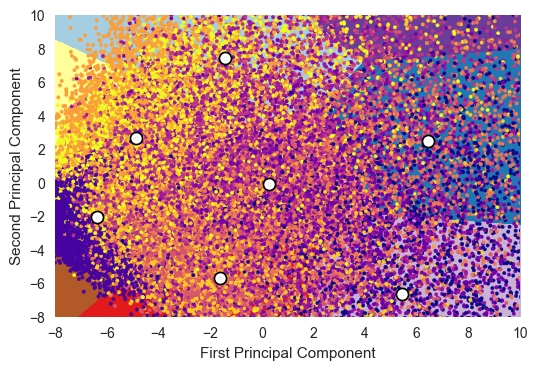

In [26]:
pca = PCA(n_components=2);
pca.fit(scaled_df);

x_pca = pca.transform(scaled_df);

print(scaled_df.shape);
print(x_pca.shape);

kmeans = KMeans(n_clusters=10, n_init=10);
kmeans.fit(x_pca);

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot

fig  = plt.figure(figsize=(6, 4), dpi=100);

axes1 = fig.add_subplot(111); 

axes1.scatter(x_pca[:,0], x_pca[:,1], c=df['label'], cmap='plasma', s=6)
axes1.set_xlabel('First Principal Component')
axes1.set_ylabel('Second Principal Component')
axes1.set_xlim(-8, 10)
axes1.set_ylim(-8, 10)
axes1.grid(False)

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

centroids = kmeans.cluster_centers_
axes1.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=99, linewidths=5, color='black', zorder=10)
axes1.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=25, linewidths=5, color='white', zorder=10)

In [37]:
wine.drop('class', axis=1).columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'phenols', 'flavanoids', 'non_flavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'OD', 'proline'],
      dtype='object')

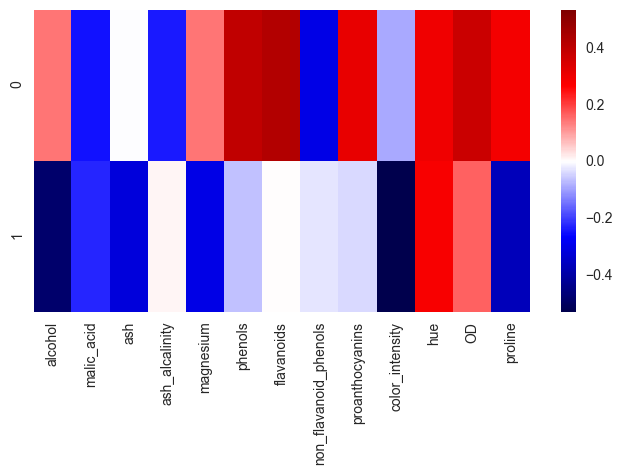

In [40]:
df_comp = pd.DataFrame(pca.components_, columns=['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'phenols', 'flavanoids', 
                            'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD', 'proline'])

fig  = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(111); 

sns.heatmap(df_comp, cmap='seismic', ax=axes1)

In [39]:
df = pd.DataFrame(data=np.array([x_pca[:,0],x_pca[:,1]]).transpose())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df['target'], test_size=0.5);

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_df, df['target'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

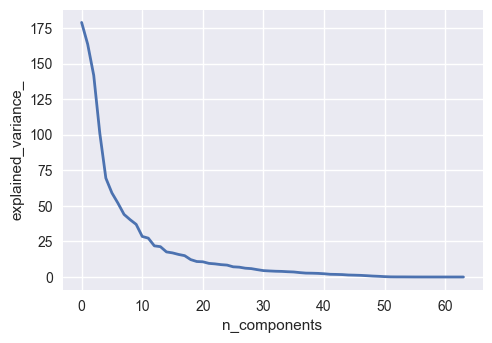

In [36]:
logistic = LogisticRegression()

pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)

plt.figure(1, figsize=(6, 4), dpi=100)
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

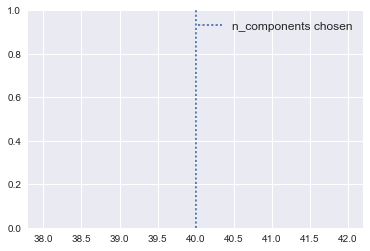

In [37]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

# Multi-Layer Perceptron

In [24]:
clf = MLPClassifier()

clf.fit(X_train,y_train);

pred = clf.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(clf, scaled_df, df['label'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[419   1   0   0   1   1   4   1   0   0]
 [  0 455   1   2   1   0   0   1   1   0]
 [  1   0 412   0   1   0   0   1   4   0]
 [  1   1   5 428   0   4   0   0   3   1]
 [  0   2   0   1 359   1   5   1   0   2]
 [  0   1   1   6   1 370   1   0   3   3]
 [  2   1   0   0   0   1 389   1   1   0]
 [  1   1   4   1   0   1   2 435   0   5]
 [  1   3   3   1   1   0   1   2 395   1]
 [  2   0   0   1   4   3   0   2   1 427]]


Classification Report
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       427
          1       0.98      0.99      0.98       461
          2       0.97      0.98      0.98       419
          3       0.97      0.97      0.97       443
          4       0.98      0.97      0.97       371
          5       0.97      0.96      0.96       386
          6       0.97      0.98      0.98       395
          7       0.98      0.97      0.97       450
          8       0.97      0.97      0.97       4

In [48]:
param_grid = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
               'learning_rate': ['constant', 'invscaling', 'adaptive'],
               'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }]

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Score')
#print(grid.cv_results_['mean_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_
print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.972160356347


Best Parameters


Best Estimator


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

# MLP? Neural Network

In [5]:
# Reshape Data

X_train_reshaped = X_train.reshape(X_train.shape[0],  28, 28)
X_test_reshaped  = X_test.reshape(X_test.shape[0],    28, 28)

train_labels = to_categorical(y_train)
num_classes = train_labels.shape[1]
num_classes

10

In [55]:
# Design Model

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=(28 * 28)))
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, train_labels, 
                  validation_split = 0.05, 
                  epochs=25, batch_size=64)

Train on 35910 samples, validate on 1890 samples
Epoch 1/20
35910/35910 [==============================] - 2s - loss: 0.3088 - acc: 0.9077 - val_loss: 0.1935 - val_acc: 0.9450

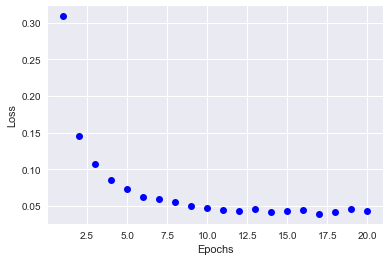

In [37]:
history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

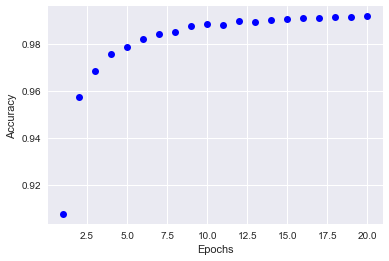

In [38]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [39]:
pred = model.predict_classes(X_test, verbose=0)

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(clf, scaled_df, df['label'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[414   0   1   0   0   1   1   1   0   0]
 [  0 449   2   1   1   1   1   0   1   0]
 [  1   1 389   7   1   2   1   4   0   0]
 [  0   2   3 407   1   3   0   2   4   1]
 [  0   1   0   0 427   1   2   0   1   5]
 [  0   0   0  10   2 347   2   1   2   1]
 [  3   0   0   0   0   0 412   0   1   0]
 [  1   3   4   3   1   0   0 425   0   1]
 [  0   2   2   8   0   8   4   3 397   2]
 [  1   1   1   7   3   1   0   6   0 395]]


Classification Report
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       418
          1       0.98      0.98      0.98       456
          2       0.97      0.96      0.96       406
          3       0.92      0.96      0.94       423
          4       0.98      0.98      0.98       437
          5       0.95      0.95      0.95       365
          6       0.97      0.99      0.98       416
          7       0.96      0.97      0.97       438
          8       0.98      0.93      0.95       4

# Convolutional Neural Network

In [5]:
# Reshape Data

X_train_reshaped = X_train.reshape(X_train.shape[0],  28, 28, 1)
X_test_reshaped  = X_test.reshape(X_test.shape[0],    28, 28, 1)

train_labels = to_categorical(y_train)
num_classes = train_labels.shape[1]
num_classes

10

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                73744     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
__________

In [ ]:
history=model.fit(X_train_reshaped, train_labels, 
                  validation_split = 0.05, 
                  epochs=10, batch_size=64)

Train on 35910 samples, validate on 1890 samples
Epoch 1/10
35910/35910 [==============================] - 218s - loss: 0.4153 - acc: 0.8749 - val_loss: 0.1360 - val_acc: 0.9587

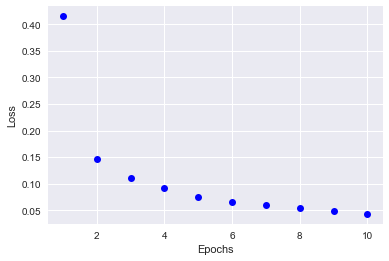

In [19]:
history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

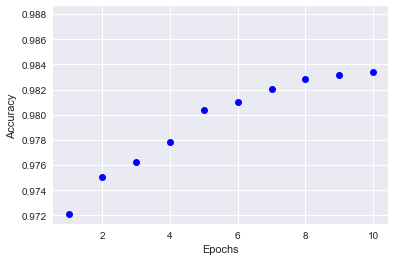

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [20]:
pred = model.predict_classes(X_test_reshaped, verbose=0)

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

#print("Cross Validation Scores")
#scores = cross_val_score(clf, scaled_df, df['label'],  cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[436   0   0   0   0   1   1   0   1   1]
 [  0 455   0   0   1   0   0   1   0   0]
 [  0   1 377   3   1   0   2   2   0   1]
 [  0   0   1 440   0   1   1   2   0   2]
 [  0   2   0   0 407   0   3   2   1   4]
 [  0   0   0   4   0 385   2   0   3   1]
 [  1   1   0   0   4   0 425   0   0   0]
 [  0   1   2   1   2   0   0 422   0   2]
 [  0   0   0   0   1   0   2   2 402   0]
 [  0   0   0   0   4   0   1   5   3 374]]


Classification Report
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       440
          1       0.99      1.00      0.99       457
          2       0.99      0.97      0.98       387
          3       0.98      0.98      0.98       447
          4       0.97      0.97      0.97       419
          5       0.99      0.97      0.98       395
          6       0.97      0.99      0.98       431
          7       0.97      0.98      0.97       430
          8       0.98      0.99      0.98       4